Targets Specified Postal Code, less obsolete Data

Bare Bone Version

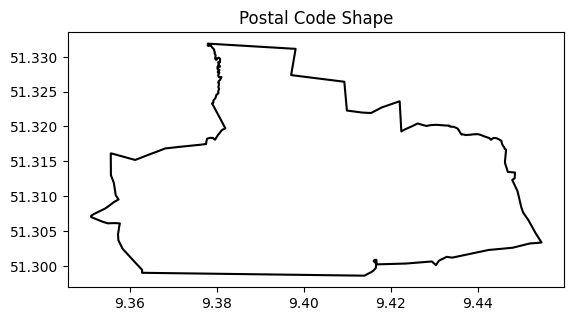

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [3]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

def extract_zip(city_polygon, tags):
    features = ox.features.features_from_polygon(city_polygon, tags)
    return gpd.GeoDataFrame(geometry=features['geometry'], data=None, crs=None) if not features.empty else gpd.GeoDataFrame()

def plot_zip(zip_gdf):
    zip_gdf.boundary.plot(color="black", linewidth=1.5)
    plt.title("Postal Code Shape")
    plt.gca().set_facecolor('white')
    plt.show()

def main():
    postal_code = "34131"
    #country = "Germany"
    city = "Kassel"
    
    city_boundary = ox.geocode_to_gdf({"city": city}, which_result=None).unary_union
    search_tags = {"postal_code": postal_code}
    postal_code_geometry = extract_zip(city_boundary, search_tags)

    if not postal_code_geometry.empty:
        plot_zip(postal_code_geometry)
    else:
        print(f"No features found for postal code {postal_code} in {country}. Please check and try again.")

main()


Commented

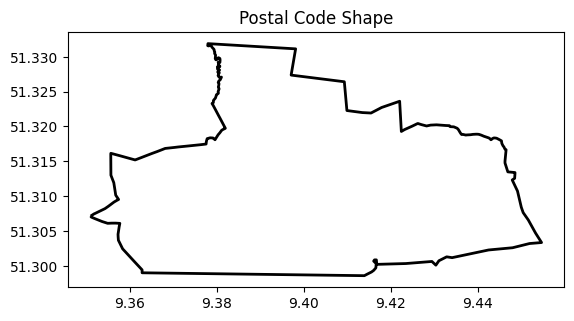

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [4]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

def extract_zip(city_polygon, tags):
    """
    Extracts geometry for a specific OSM feature.

    Args:
        city_polygon (shapely.geometry.Polygon or shapely.geometry.MultiPolygon): City's geographic boundaries.
        tags (dict): Dict of tags used to find elements.

    Returns:
        gdf (geopandas.GeoDataFrame): GeoDataFrame containing the extracted geometry.
    """
    features = ox.features.features_from_polygon(city_polygon, tags)
    return gpd.GeoDataFrame(geometry=features['geometry']) if not features.empty else gpd.GeoDataFrame()

def plot_zip(zip_gdf):
    """
    Plots the boundary of a postal code area.

    Args:
        zip_gdf (geopandas.GeoDataFrame): GeoDataFrame representing a postal code area.

    Returns:
        None
    """
    zip_gdf.boundary.plot(color="black", linewidth=2)
    plt.title("Postal Code Shape")
    plt.gca().set_facecolor('white')
    plt.show()

def main():
    """
    Main function to execute the workflow.
    """
    postal_code = "34131"
    #country = "Germany"
    city = "Kassel"
    
    city_boundary = ox.geocode_to_gdf({"city": city}).unary_union
    search_tags = {"postal_code": postal_code}
    postal_code_geometry = extract_zip(city_boundary, search_tags)

    if not postal_code_geometry.empty:
        plot_zip(postal_code_geometry)
    else:
        print(f"No features found for postal code {postal_code} in {country}. Please check and try again.")

main()
